In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('Real estate valuation data set.csv')

In [3]:
df.columns


Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
df.drop(['No','X1 transaction date', 'X5 latitude', 'X6 longitude'], axis=1, inplace=True)

In [6]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

In [7]:
df[['age', 'nearest_mrt','number_of_stores','price']] = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']] 

In [9]:
df.drop(['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area'], axis=1, inplace=True)


In [10]:
df

,age,nearest_mrt,number_of_stores,price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


In [11]:
X = df.drop('price', axis=1)
y = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 3), (83, 3), (331,), (83,))

In [13]:
X_train.corr()

,age,nearest_mrt,number_of_stores
age,1.00000,0.029570,0.049510
nearest_mrt,0.02957,1.000000,-0.608291
number_of_stores,0.04951,-0.608291,1.000000


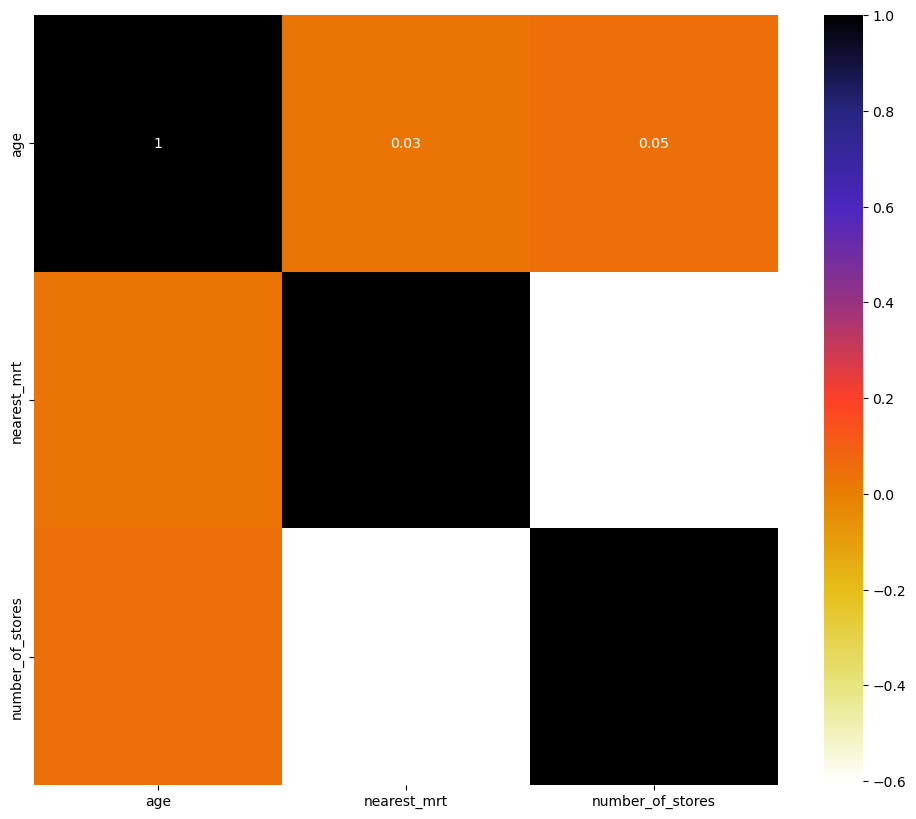

In [14]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [16]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X train after scaling')

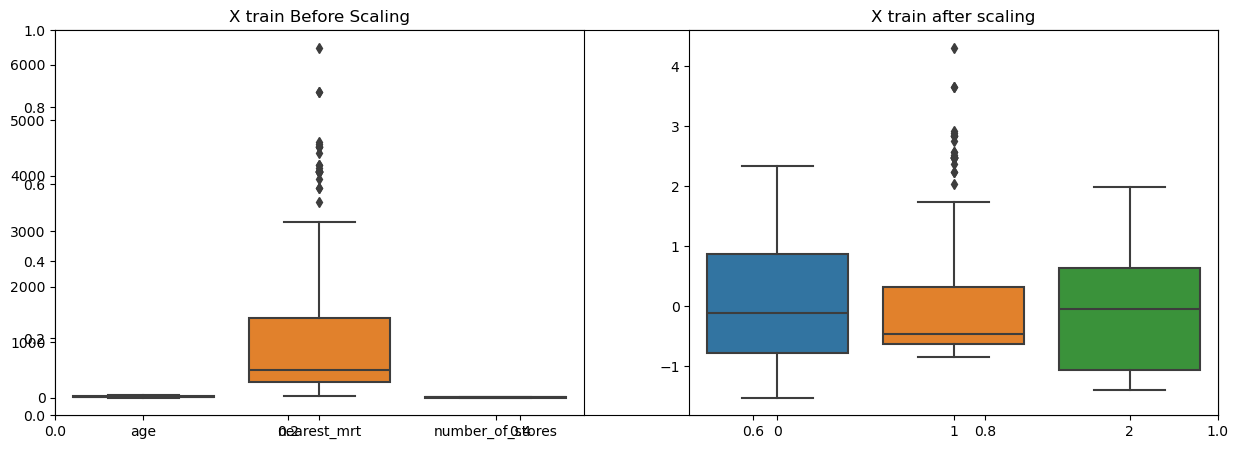

In [17]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X train after scaling') 

## Modeling

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE, r2_score

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = MAE(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print('Linear Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Linear Regression
R2 Score Value 0.6490
MAE value: 5.632384


### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

print('Lasso Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Lasso Regression
R2 Score Value 0.6377
MAE value: 5.873705


### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print('Ridge Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Ridge Regression
R2 Score Value 0.6491
MAE value: 5.633323


### Support Vector Regression

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)

print('Support Vector Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Support Vector Regression
R2 Score Value 0.6522
MAE value: 5.405098


### Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = MAE(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print('Random Forrest Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Random Forrest Regressor
R2 Score Value 0.7771
MAE value: 4.399989


### K-Neighbors Regressor

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = MAE(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print('K-Neighbors Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


K-Neighbors Regressor
R2 Score Value 0.7386
MAE value: 4.519036


## Tuning

### Tuning Random Forest

In [24]:
param_grid = [{'bootstrap': [True, False], 
               'max_depth':[10,20,30,40,50,60,70,80,90, 100, 110, 120], 
               'min_samples_leaf':[1,3,4], 
               'min_samples_split':[2,6,10], 'n_estimators':[5,20,50,100]}]
f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg, param_grid, cv=10, verbose=2, n_jobs=-1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [25]:
best_random_grid = Random_rf.best_estimator_
bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)
print('Random Forest Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Random Forest Tuned
R2 Score Value 0.8017
MAE value: 4.145136


### Tuning Ridge Regression

In [26]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore')
ridge_params = [{'alpha': (np.logspace(-11,11,100)),
                 'solver':['auto', 'svd', 'cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}]
ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs=-1)
random_ridge.fit(X_train_scaled, y_train)

best_ridge = random_ridge.best_estimator_
rbest_pred = best_ridge.predict(X_test_scaled)
mae = MAE(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)

print('Ridge Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Tuned
R2 Score Value 0.6490
MAE value: 5.632534


### Feature Importance

Text(0, 0.5, 'Features')

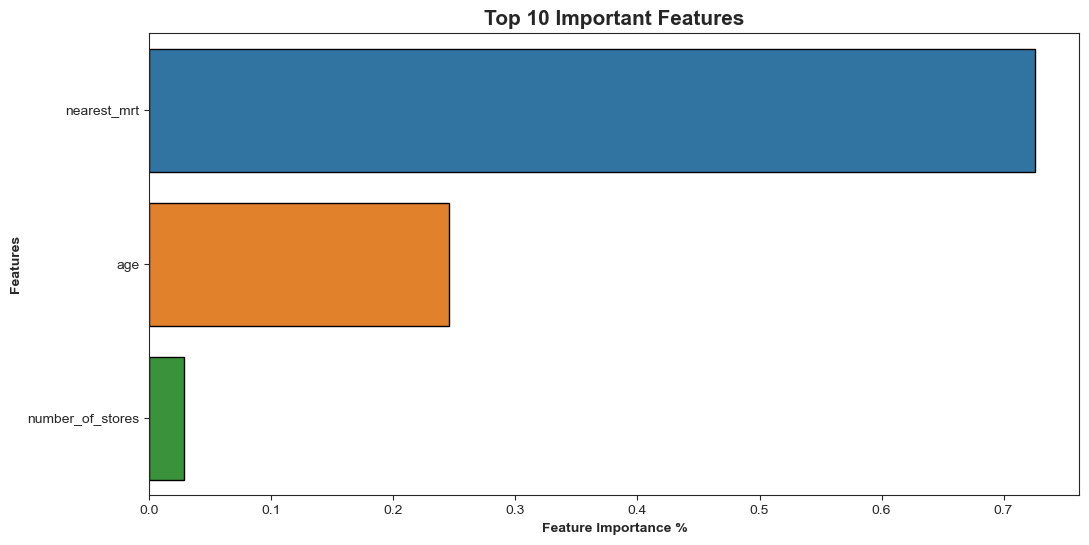

In [27]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':feature_importances}).sort_values('importance', ascending=False)
importance_df
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature', ec='black')
ax.set_title('Top 10 Important Features', weight='bold', fontsize=15)
ax.set_xlabel('Feature Importance %', weight='bold')
ax.set_ylabel('Features', weight='bold')